Este script:
1. Lee el dataset
2. Calcula la matriz de correlación entre todas las materias
3. Encuentra automáticamente las dos materias que tienen la correlación más alta
4. Crea un scatter plot de estas dos materias
5. Añade una línea de tendencia
6. Muestra el coeficiente de correlación
7. Guarda el resultado en 'scatter_plot.png'

La correlación va de -1 a 1, donde:
- 1 indica una correlación positiva perfecta
- -1 indica una correlación negativa perfecta
- 0 indica ninguna correlación

El script encontrará automáticamente las dos materias que tienen la correlación más alta (más cercana a 1 o -1), lo que nos indicará qué dos características son más similares en términos de sus patrones de puntuación.

Al ejecutar el script, mostrará en la consola cuáles son las dos materias más similares y su coeficiente de correlación, además de generar el gráfico que lo visualiza.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Establecemos la ruta y leemos el archivo convirtiéndolo en un DataFrame
file_train = '../datasets/dataset_train.csv'
df_train = pd.read_csv(file_train, index_col=0)

In [3]:
# Get list of course columns (excluding non-course columns)
courses = df_train.select_dtypes(include=['float64']).columns
courses

Index(['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')

In [4]:
import json
import sys
sys.path.append('..')

# Leer el archivo JSON
with open('../output/colum_to_drop.json', 'r') as file:
    data = json.load(file)
    
# Obtener la columna a eliminar
column_to_drop = data['column_to_drop']

# Eliminar la columna del Index
courses = courses.drop(column_to_drop)
courses

Index(['Arithmancy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')

In [5]:
# Calculate correlation matrix
correlation_matrix = df_train[courses].corr()
#print('correlation_matrix:', correlation_matrix)
# Find the two most correlated features
# Get upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
#print('nupper_tri:', upper_tri)

# Find the two most correlated features (in absolute value)
upper_tri_abs = np.abs(upper_tri)
max_corr_abs = upper_tri_abs.max().max()
feature1, feature2 = np.where(upper_tri_abs == max_corr_abs)
feature1, feature2 = courses[feature1[0]], courses[feature2[0]]

# Retrieve the original correlation value
max_corr = upper_tri.loc[feature1, feature2]
print(f"Max. abs. correlation: {max_corr:.3f}")
print(f"Functions with maximum absolute correlation: '{feature1}' and '{feature2}'.")

Max. abs. correlation: -0.896
Functions with maximum absolute correlation: 'History of Magic' and 'Flying'.


In [6]:
# Eliminamos las filas con datos incompletos en las dos características analizadas
df_train = df_train.dropna(subset=[feature1, feature2])

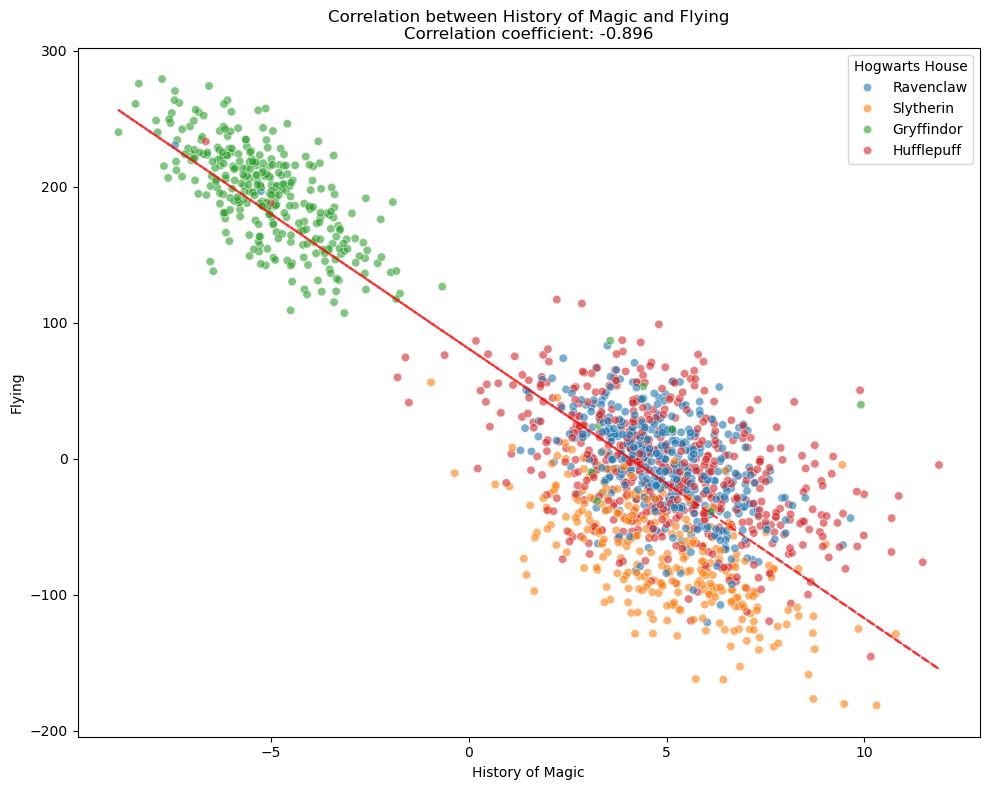


The scratter_plot.png graph has been saved in the 'output' folder.

Question:
What are the two features that are similar?

The most similar features are History of Magic and Flying
Their correlation coefficient is: -0.896


In [7]:
# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_train, x=feature1, y=feature2, hue='Hogwarts House', alpha=0.6)

# Add correlation line
z = np.polyfit(df_train[feature1], df_train[feature2], 1)
p = np.poly1d(z)
plt.plot(df_train[feature1], p(df_train[feature1]), "r--", alpha=0.8)

# Add correlation coefficient to title
plt.title(f'Correlation between {feature1} and {feature2}\nCorrelation coefficient: {max_corr:.3f}')
plt.xlabel(feature1)
plt.ylabel(feature2)

# Adjust layout and save
plt.tight_layout()
plt.savefig('../output/scatter_plot.png')
plt.show()
plt.close()

print("\nThe scratter_plot.png graph has been saved in the 'output' folder.")

print("\nQuestion:\nWhat are the two features that are similar?\n")

# Print the correlation value
print(f"The most similar features are {feature1} and {feature2}")
print(f"Their correlation coefficient is: {max_corr:.3f}")